# **FIFA 20**

https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset

<!-- Explanation: Title and introduction to the notebook. -->

<!-- Explicación: Título e introducción al notebook. -->

# **1.- COMPRENSIÓN DE LOS DATOS**

<!-- Explanation: Starting the data understanding section. -->

<!-- Explicación: Iniciando la sección de comprensión de datos. -->

In [1]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dataset = pd.read_csv('players_20.csv', header = 0)
dataset.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [2]:
# Explicación: Verificando las dimensiones del DataFrame (número de filas y columnas).
dataset.shape

(18278, 104)

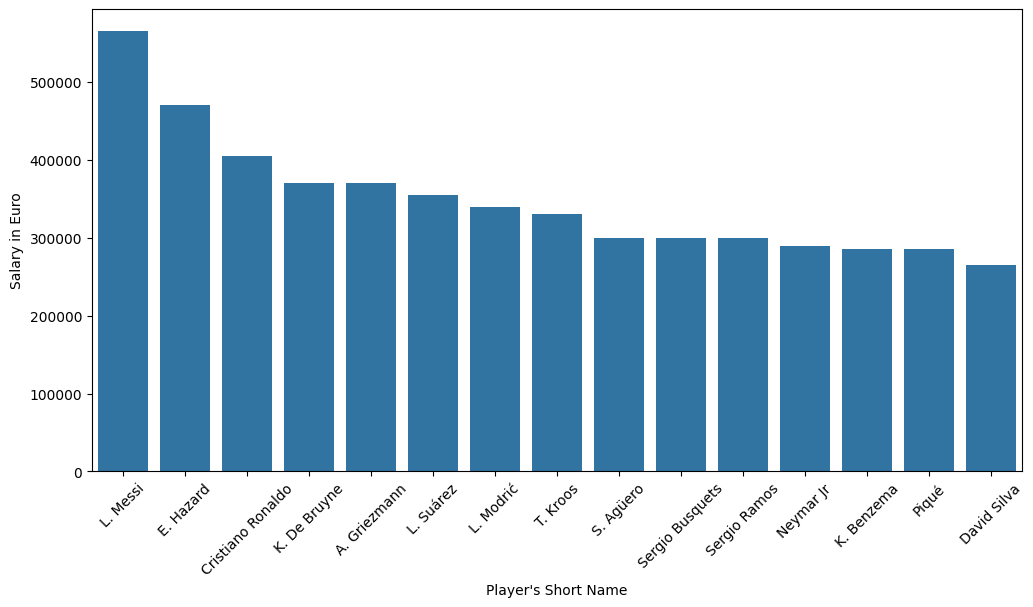

In [3]:
# Explicación: Ordenando los datos y creando un gráfico de barras para visualizar los jugadores mejor pagados.
# Los 10 futbolistas mejor pagados
player_salary = dataset[["short_name", "wage_eur"]].sort_values(by="wage_eur", ascending=False).reset_index(drop=True)
player_salary[:10]

plt.figure(figsize=(12, 6))
sns.barplot(
    x = "short_name",
    y = "wage_eur",
    data = player_salary[:15]
)
plt.xlabel("Player's Short Name")
plt.ylabel("Salary in Euro")
plt.xticks(rotation=45)
plt.show()

# **2.- REGRESION LINEAL MÚLTIPLE**
Vamos a inferir el potencial de los porteros


In [4]:
# Explicación: Realizando una operación o análisis de datos.
porteros = dataset[dataset['team_position']=='GK']
porteros.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramses Becker,26,1992-10-02,191,91,Brazil,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,28,1990-11-07,192,82,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,25,1993-08-17,188,86,Brazil,Manchester City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Explicación: Verificando las dimensiones del DataFrame (número de filas y columnas).
porteros.shape

(662, 104)

In [6]:
# Explicación: Realizando una operación o análisis de datos.
# Nos quedamos con aquellos atributos que más tienen que ver con los porteros

X = porteros[['age', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure']]
y = porteros['potential']

In [7]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
# Explicación: Realizando una operación o análisis de datos.
# Vamos a visualizar los resultados
X_test['Potential'] = y_test
X_test['Predicted Potential'] = predictions
dataset_merged = dataset.merge(X_test, how='outer', left_index=True, right_index=True)
dataset_merged = dataset_merged.dropna(subset=['Predicted Potential'])
dataset_merged.loc[:, ['short_name', 'potential', 'Potential', 'Predicted Potential']]

,short_name,potential,Potential,Predicted Potential
3,J. Oblak,93,93.0,93.616927
13,Alisson,91,91.0,90.349460
14,De Gea,90,90.0,89.953087
25,Ederson,91,91.0,90.479712
28,T. Courtois,89,89.0,88.997846
...,...,...,...,...
16335,Dong Chunyu,58,58.0,62.340379
16961,Bao Yaxiong,65,65.0,63.848995
17072,Shen Jun,56,56.0,56.632438
17341,M. McGinley,57,57.0,58.681874


In [9]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9135592465438014

# **3.- ÁRBOLES DE DECISIÓN**
Vamos a inferir de nuevo el potencial de los porteros utilizando árboles de decisión

In [10]:
# Explicación: Realizando una operación o análisis de datos.
porteros = dataset[dataset['team_position']=='GK']
X = porteros[['age', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_composure']]
y = porteros['potential']

In [11]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1)
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [12]:
# Explicación: Realizando una operación o análisis de datos.
# Vamos a visualizar los resultados
X_test['Potential'] = y_test
X_test['Predicted Potential'] = predictions
dataset_merged = dataset.merge(X_test, how='outer', left_index=True, right_index=True)
dataset_merged = dataset_merged.dropna(subset=['Predicted Potential'])
dataset_merged.loc[:, ['short_name', 'potential', 'Potential', 'Predicted Potential']]

,short_name,potential,Potential,Predicted Potential
3,J. Oblak,93,93.0,93.0
13,Alisson,91,91.0,86.0
14,De Gea,90,90.0,88.0
25,Ederson,91,91.0,85.0
28,T. Courtois,89,89.0,86.0
...,...,...,...,...
16335,Dong Chunyu,58,58.0,59.0
16961,Bao Yaxiong,65,65.0,65.0
17072,Shen Jun,56,56.0,62.0
17341,M. McGinley,57,57.0,58.0


In [13]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8207252774712117

# **4.- CORRELACIÓN**


## **4.1.- Limpieza de datos**

In [14]:
# Explicación: Verificando las dimensiones del DataFrame (número de filas y columnas).
# Como hay muchos datos vamos a reducir el número de jugadores
dataset = dataset[dataset.overall > 86]
dataset.shape

(55, 104)

In [15]:
# Explicación: Realizando una operación o análisis de datos.
dataset['nationality'].value_counts()

nationality
Spain             7
France            7
Brazil            6
Belgium           6
Germany           5
Argentina         3
Uruguay           3
Portugal          2
Italy             2
England           2
Senegal           2
Slovenia          2
Egypt             1
Croatia           1
Netherlands       1
Poland            1
Denmark           1
Gabon             1
Korea Republic    1
Costa Rica        1
Name: count, dtype: int64

In [16]:
# Explicación: Realizando una operación o análisis de datos.
dataset['preferred_foot'].value_counts()

preferred_foot
Right    42
Left     13
Name: count, dtype: int64

In [17]:
# Explicación: Realizando una operación o análisis de datos.
dataset['preferred_foot'].isnull().sum()

0

### **4.1.1.- Eliminar atributos**

In [18]:
# Explicación: Realizando una operación o análisis de datos.
# Para simplificar nos quedaremos solo con las columnas numéricas y con el nombre
nombres = dataset['short_name']
for column in dataset:
  if (dataset[column].dtype == 'O'):
      dataset.drop([column], axis=1, inplace=True)
dataset['short_name'] = nombres
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 54
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   55 non-null     int64  
 1   age                         55 non-null     int64  
 2   height_cm                   55 non-null     int64  
 3   weight_kg                   55 non-null     int64  
 4   overall                     55 non-null     int64  
 5   potential                   55 non-null     int64  
 6   value_eur                   55 non-null     int64  
 7   wage_eur                    55 non-null     int64  
 8   international_reputation    55 non-null     int64  
 9   weak_foot                   55 non-null     int64  
 10  skill_moves                 55 non-null     int64  
 11  release_clause_eur          55 non-null     float64
 12  team_jersey_number          55 non-null     float64
 13  contract_valid_until        55 non-null   

In [19]:
# Explicación: Realizando una operación o análisis de datos.
# Vamos a eliminar aquellos atributos con un número considerable de valores nulos y aquellos que no nos aportan información
dataset.drop(['sofifa_id', 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 54
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         55 non-null     int64  
 1   height_cm                   55 non-null     int64  
 2   weight_kg                   55 non-null     int64  
 3   overall                     55 non-null     int64  
 4   potential                   55 non-null     int64  
 5   value_eur                   55 non-null     int64  
 6   wage_eur                    55 non-null     int64  
 7   international_reputation    55 non-null     int64  
 8   weak_foot                   55 non-null     int64  
 9   skill_moves                 55 non-null     int64  
 10  release_clause_eur          55 non-null     float64
 11  team_jersey_number          55 non-null     float64
 12  contract_valid_until        55 non-null     float64
 13  pace                        45 non-null   

### **4.1.2.- Valores nulos**
Para simplificar sustituiremos los valores nulos por la media

In [20]:
dataset.isnull().sum()

age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_s

In [21]:
# Calcula la media de todas las columnas numéricas (excluyendo 'short_name')
numeric_dataset = dataset.drop(columns=['short_name']).mean()

# Reemplaza los valores nulos en las columnas numéricas con la media respectiva
dataset = dataset.fillna(numeric_dataset)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 54
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         55 non-null     int64  
 1   height_cm                   55 non-null     int64  
 2   weight_kg                   55 non-null     int64  
 3   overall                     55 non-null     int64  
 4   potential                   55 non-null     int64  
 5   value_eur                   55 non-null     int64  
 6   wage_eur                    55 non-null     int64  
 7   international_reputation    55 non-null     int64  
 8   weak_foot                   55 non-null     int64  
 9   skill_moves                 55 non-null     int64  
 10  release_clause_eur          55 non-null     float64
 11  team_jersey_number          55 non-null     float64
 12  contract_valid_until        55 non-null     float64
 13  pace                        55 non-null   

## **4.2.- Correlación**

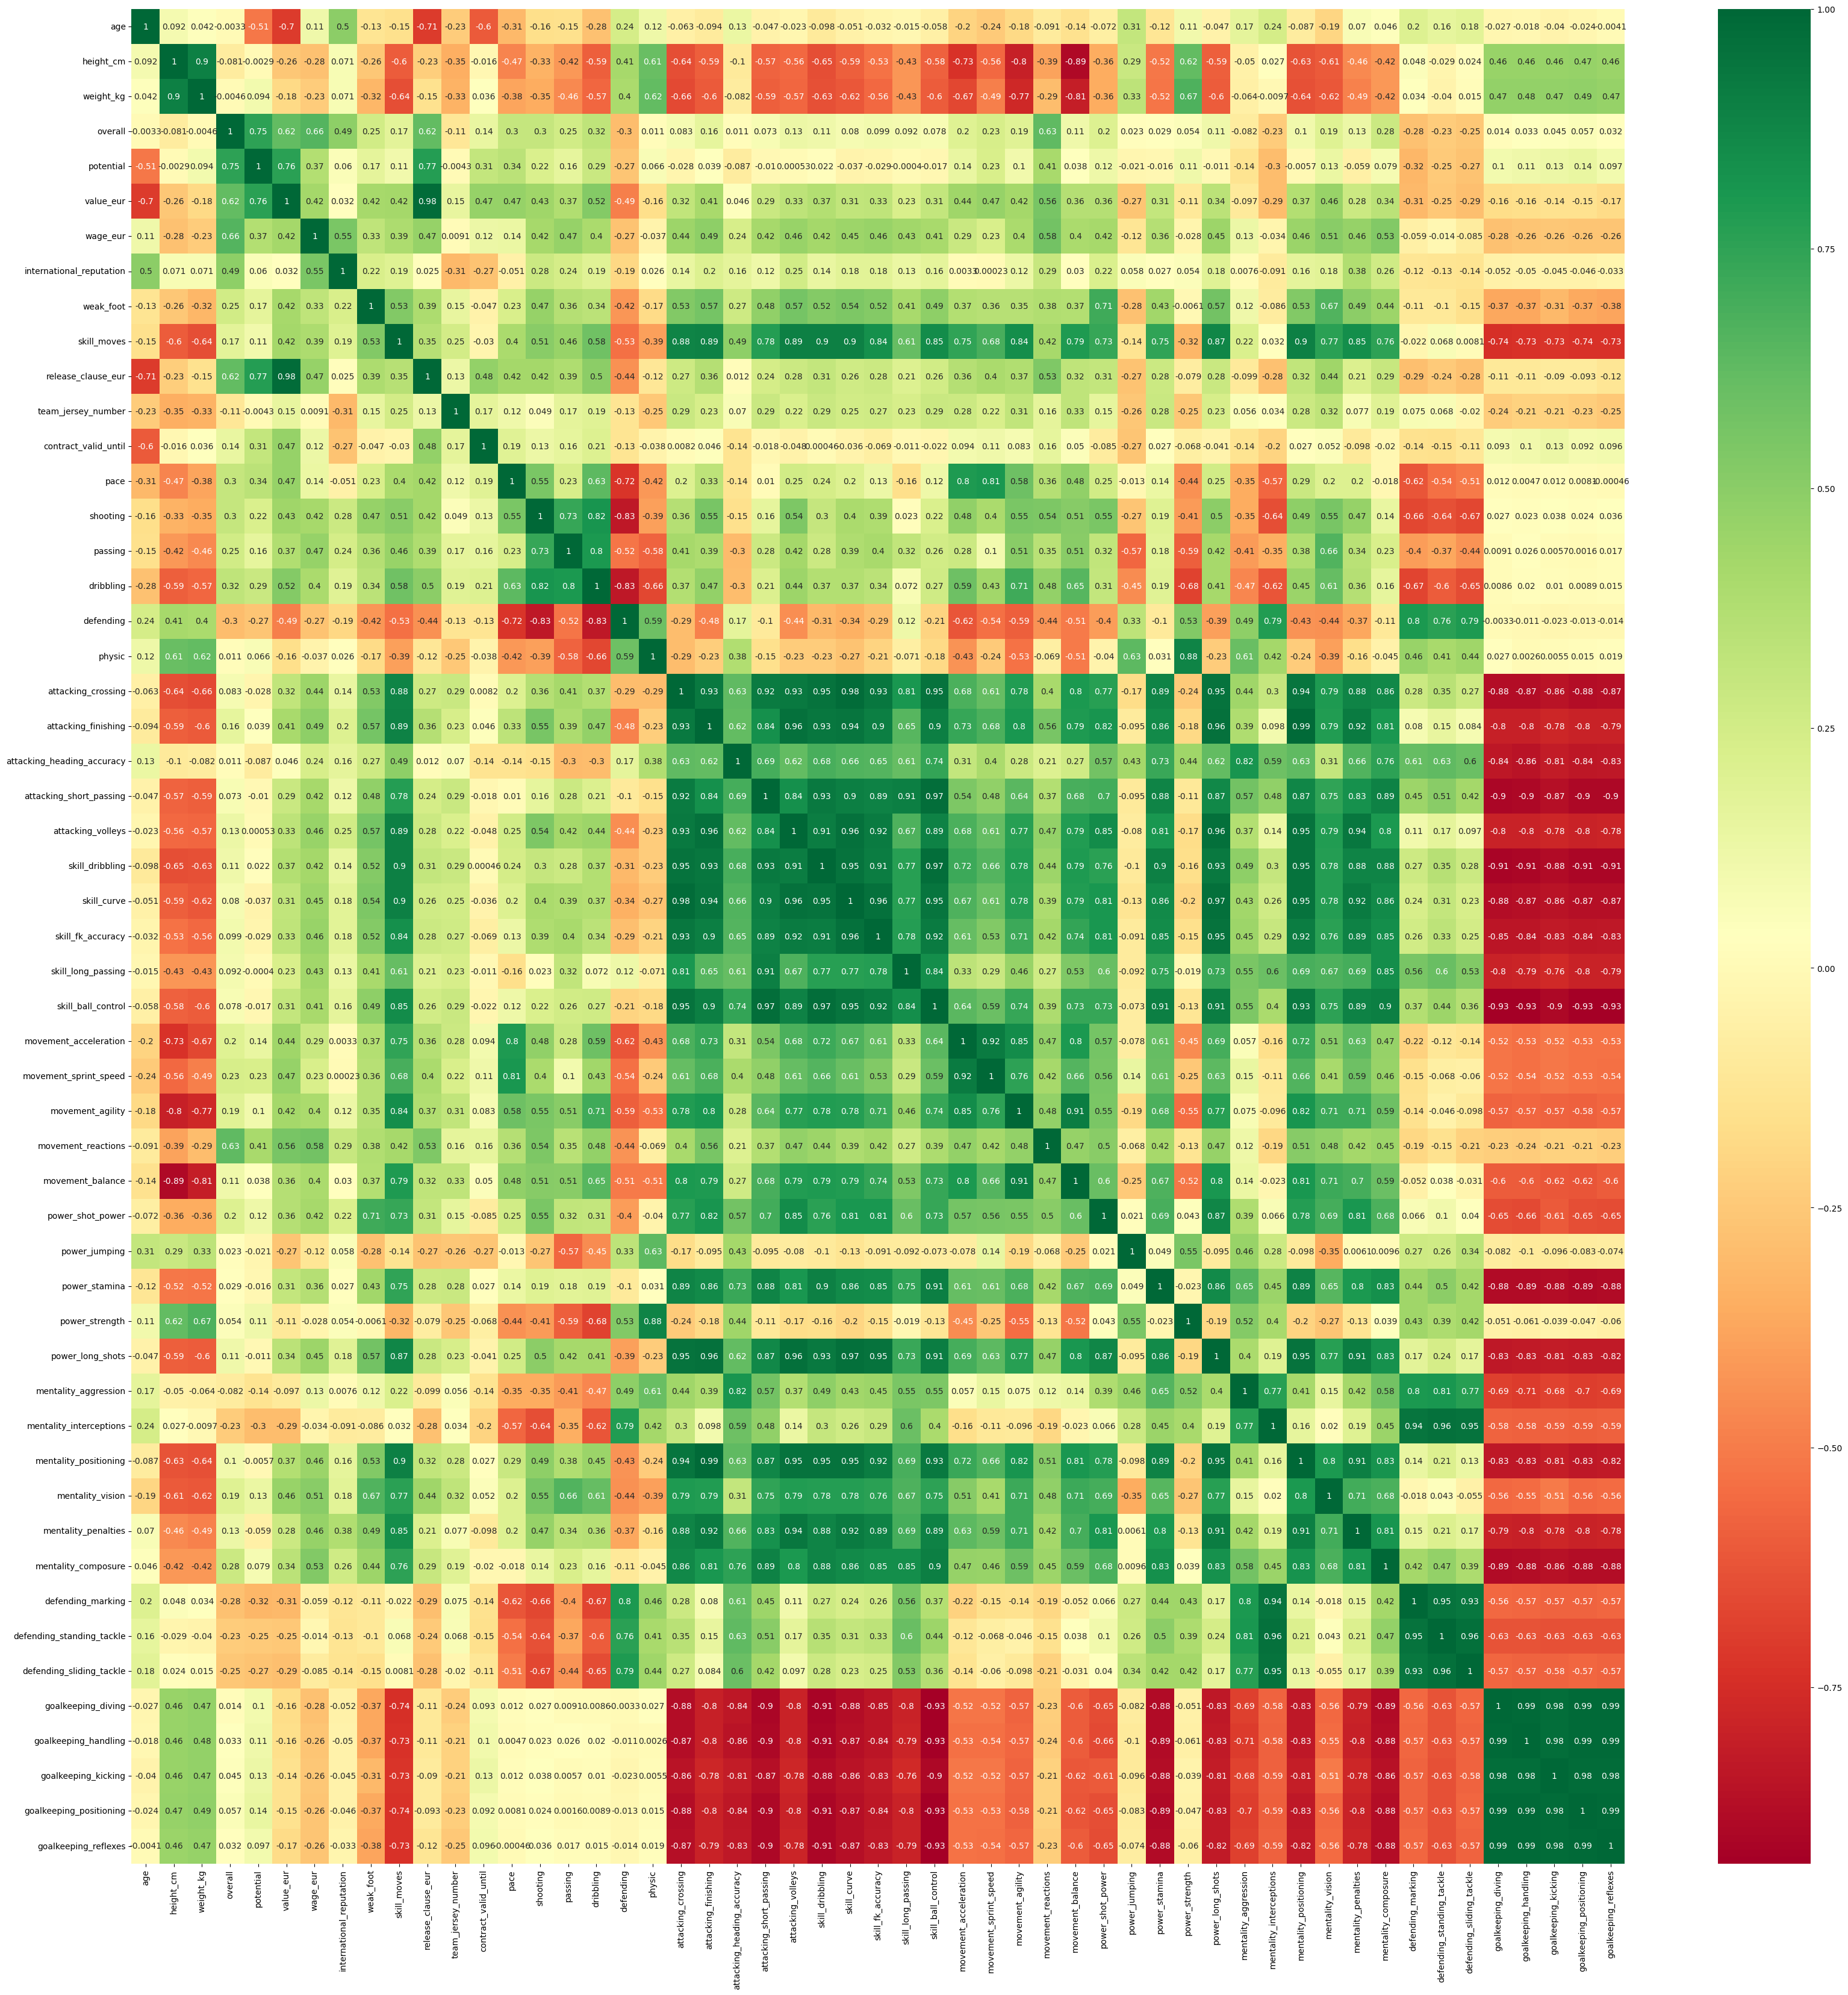

In [25]:
numeric_dataset = dataset.select_dtypes(include=['number'])

# Explicación: Realizando una operación o análisis de datos.
plt.figure(figsize=(40,40))
g=sns.heatmap(numeric_dataset.corr(), annot=True, cmap="RdYlGn") 

## **4.3.- Normalización**

In [26]:
# Explicación: Realizando una operación o análisis de datos.
nombre = dataset['short_name']
dataset.values

array([[32, 170, 72, ..., 14, 8, 'L. Messi'],
       [34, 187, 83, ..., 14, 11, 'Cristiano Ronaldo'],
       [27, 175, 68, ..., 15, 11, 'Neymar Jr'],
       ...,
       [28, 174, 70, ..., 9, 13, 'Thiago'],
       [32, 185, 80, ..., 82, 90, 'K. Navas'],
       [28, 163, 59, ..., 9, 10, 'L. Insigne']], dtype=object)

In [27]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
from sklearn.preprocessing import StandardScaler

dataset.drop(['short_name'], axis=1, inplace=True)
scaler=StandardScaler()
scaler.fit(dataset)
dataset_scaled=scaler.transform(dataset)

dataset_scaled

array([[ 0.88768284, -1.55236577, -0.72386676, ..., -0.2984245 ,
        -0.34668449, -0.53888874],
       [ 1.51361305,  0.58213716,  0.52382381, ..., -0.2984245 ,
        -0.34668449, -0.44149921],
       [-0.67714268, -0.92457079, -1.17757243, ..., -0.2984245 ,
        -0.31293644, -0.44149921],
       ...,
       [-0.36417758, -1.05012979, -0.95071959, ..., -0.59021734,
        -0.51542473, -0.37657286],
       [ 0.88768284,  0.33101917,  0.18354456, ...,  1.89002182,
         1.94818275,  2.1230918 ],
       [-0.36417758, -2.43127874, -2.19841017, ..., -0.3348986 ,
        -0.51542473, -0.47396239]])

## **4.4.- PCA**

In [28]:
"""
Vamos a utilizar PCA para reducir la dimensionalidad de conjuntos de los datos grandes y complejos.
La reducción de dimensionalidad lograda por PCA se basa en el hecho de que muchos datos pueden estar
correlacionados y que la información se puede comprimir en unas pocas dimensiones sin perder demasiada información importante.

# Este código realiza un Análisis de Componentes Principales (PCA) en un conjunto de datos
# previamente escalados. Luego, muestra información sobre la varianza explicada por cada componente
# principal y una gráfica que muestra cómo se acumula la varianza explicada a medida que se agregan más componentes.
"""

from sklearn.decomposition import PCA

pca=PCA(n_components=9)
pca.fit(dataset_scaled) # obtener los componentes principales
dataset_pca=pca.transform(dataset_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [29]:
# Explicación: Verificando las dimensiones del DataFrame (número de filas y columnas).
print("shape of dataset_pca", dataset_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))

shape of dataset_pca (55, 9)
[0.46057143 0.21191373 0.07510923 0.05608364 0.04563848 0.03060826
 0.01746996 0.01659456 0.01343923]
suma: 0.6724851591430784


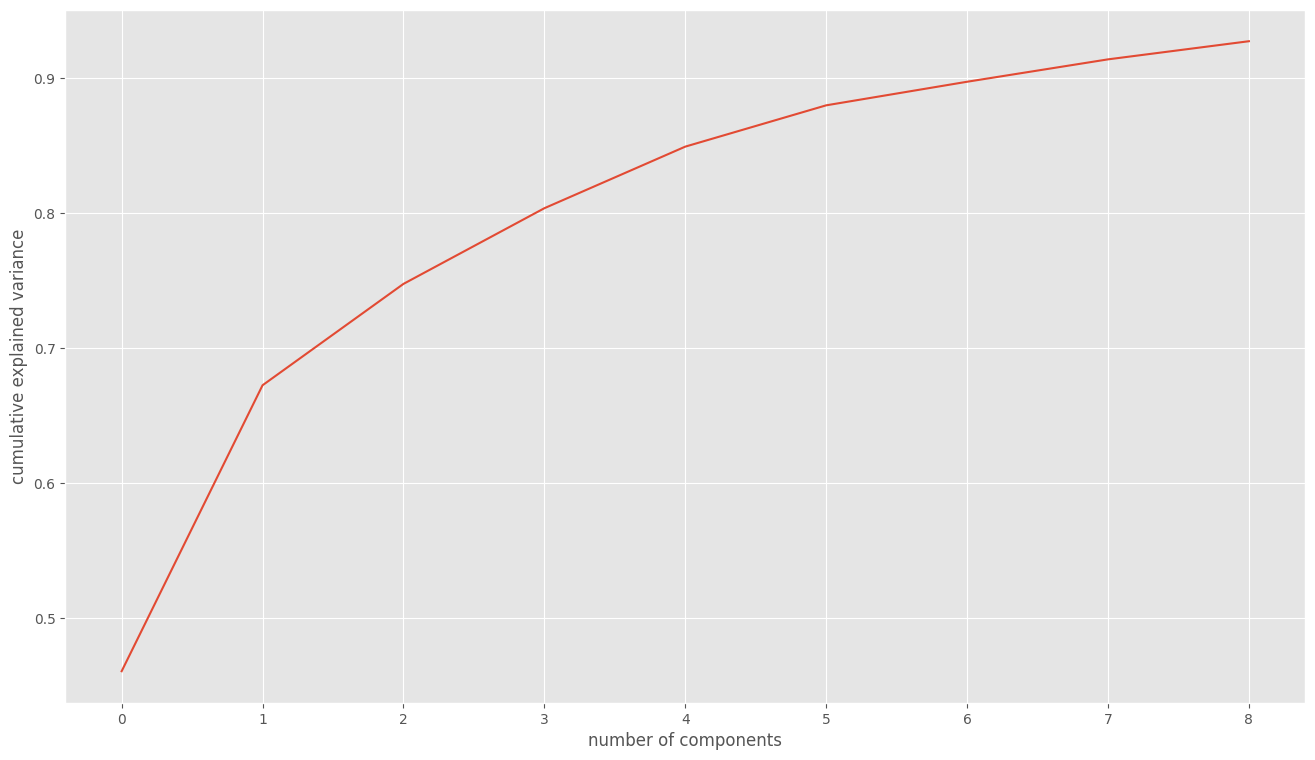

In [30]:
# Explicación: Realizando una operación o análisis de datos.
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# **4.5.- CLUSTERING**

In [31]:
# Explicación: Realizando una operación o análisis de datos.
pca=PCA(n_components=2)
pca.fit(dataset_scaled) # obtener los componentes principales
dataset_pca=pca.transform(dataset_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
dataset_pca

array([[-6.23344406, -4.60947976],
       [-4.49800779, -2.34583015],
       [-5.62380122, -5.11074025],
       [ 9.21041451, -3.96217689],
       [-5.02911337, -4.17852454],
       [-4.81219428, -1.26409126],
       [ 8.81974969, -3.20519785],
       [ 0.4611145 ,  4.06698091],
       [-4.14068633,  0.09683698],
       [-3.94961884, -2.3697357 ],
       [-3.81621319, -3.12590958],
       [ 3.89207544,  5.72702213],
       [-2.77052282, -0.31315485],
       [ 9.5950102 , -3.60039265],
       [ 8.64115121, -3.11124904],
       [-1.67135966,  2.13837933],
       [ 2.8845862 ,  6.61342098],
       [-3.64767273, -2.08054814],
       [-1.01852361,  4.52045041],
       [-2.46590916, -0.27271079],
       [-2.74645596, -0.41189824],
       [-0.20059605,  4.02271913],
       [-4.34430029, -1.10834021],
       [-3.6165003 , -2.17277736],
       [-3.22472348,  1.47551943],
       [ 8.00721643, -3.50946283],
       [-2.96037508, -3.38525405],
       [-3.77316006, -1.46682349],
       [10.37550572,

In [32]:
# Explicación: Importación de bibliotecas necesarias para el análisis y visualización de datos.
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(dataset_pca)
# get the cluster labels
labels = kmeans.predict(dataset_pca)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()

C:\Users\amartinezgil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
# Explicación: Realizando una operación o análisis de datos.
dataset_pca = pd.DataFrame(dataset_pca)
dataset_pca['cluster'] = clusters
dataset_pca['name'] = nombre
dataset_pca.columns = ['x', 'y', 'cluster', 'name']
dataset_pca.head(50)

,x,y,cluster,name
0,-6.233444,-4.609480,1,L. Messi
1,-4.498008,-2.345830,1,Cristiano Ronaldo
2,-5.623801,-5.110740,1,Neymar Jr
3,9.210415,-3.962177,2,J. Oblak
4,-5.029113,-4.178525,1,E. Hazard
5,-4.812194,-1.264091,1,K. De Bruyne
6,8.819750,-3.205198,2,M. ter Stegen
7,0.461115,4.066981,3,V. van Dijk
8,-4.140686,0.096837,4,L. Modrić
9,-3.949619,-2.369736,1,M. Salah


## **4.6.- Representación gráfica**

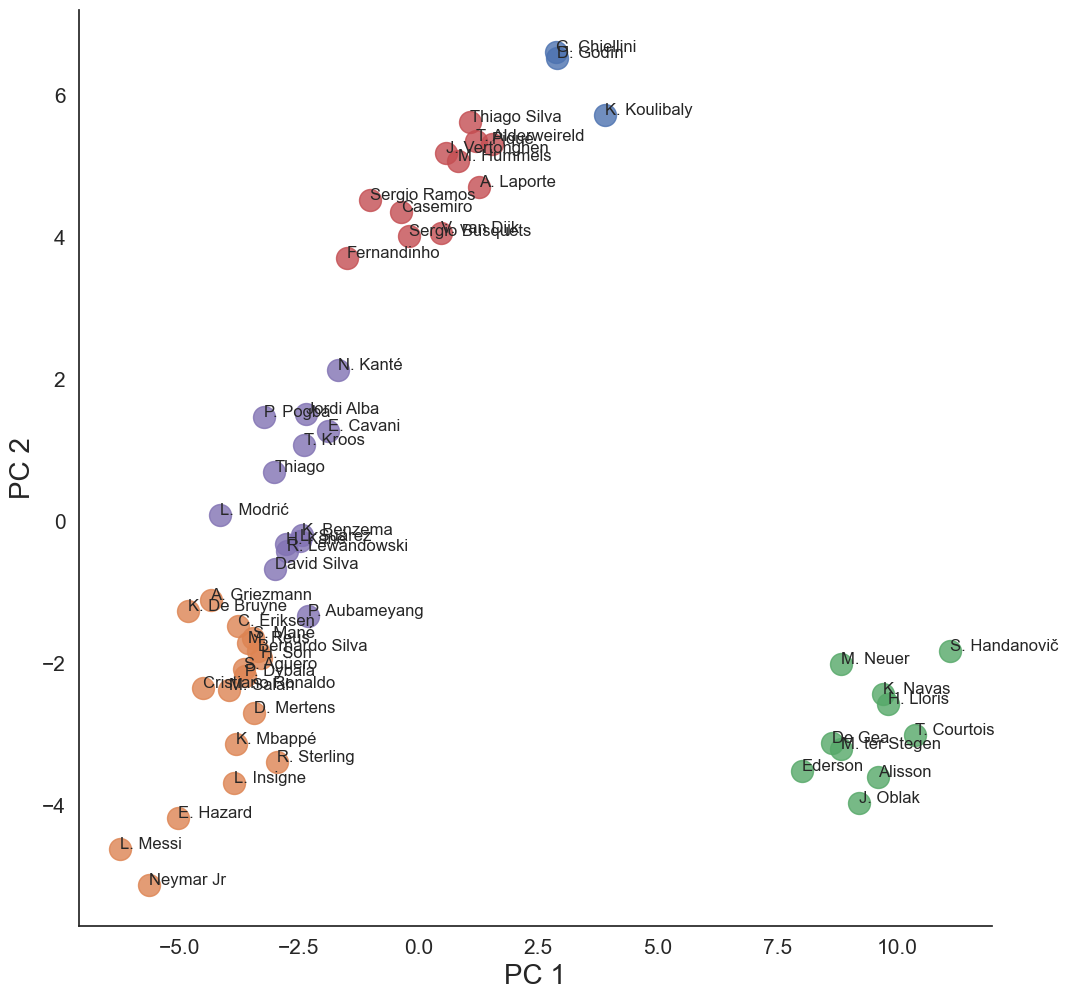

In [34]:
# Explicación: Realizando una operación o análisis de datos.
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = dataset_pca, legend=False, fit_reg=False, height = 10, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(dataset_pca.x, dataset_pca.y, dataset_pca.name):
  texts.append(plt.text(x, y, s))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()